## **Import needed libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **EDA**

In [2]:
df = pd.read_csv('/kaggle/input/house-price/house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


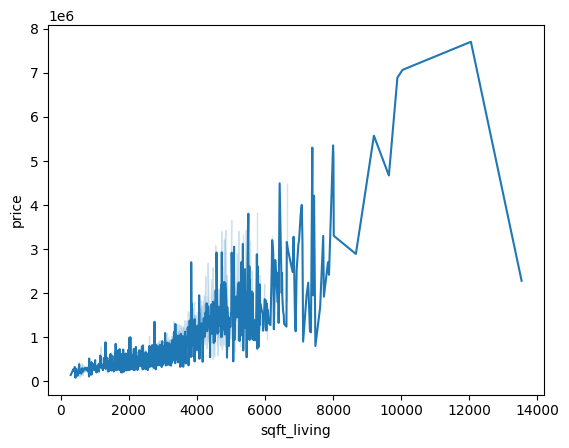

In [5]:
sns.lineplot(x=df['sqft_living'] , y=df['price']);

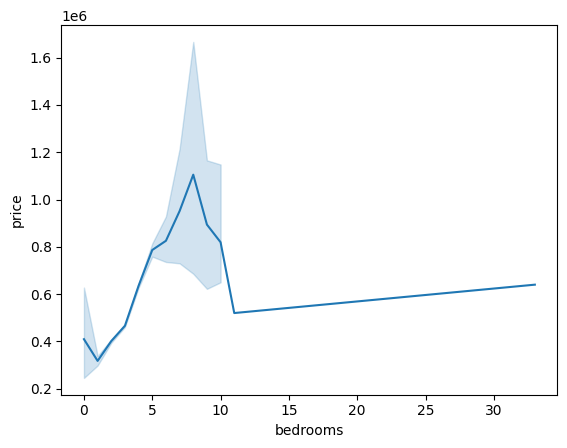

In [6]:
sns.lineplot(x=df['bedrooms'] , y=df['price']);

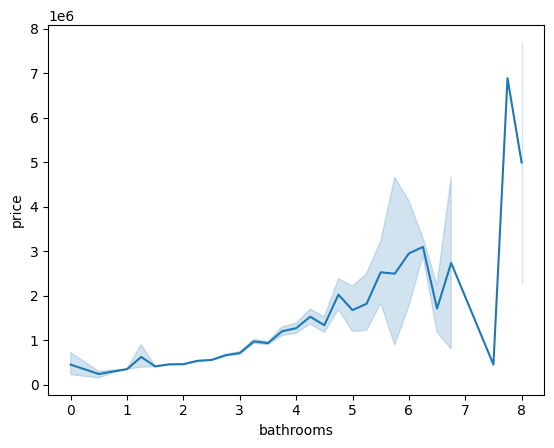

In [7]:
sns.lineplot(x=df['bathrooms'] , y=df['price']);

#### As we see the data doesn't seem linear and we can't predict using linear regression models

## **Preprocessing**

### **1. Drop unneeded columns**

In [8]:
df.drop(columns=['id' , 'date' , 'zipcode'] , inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


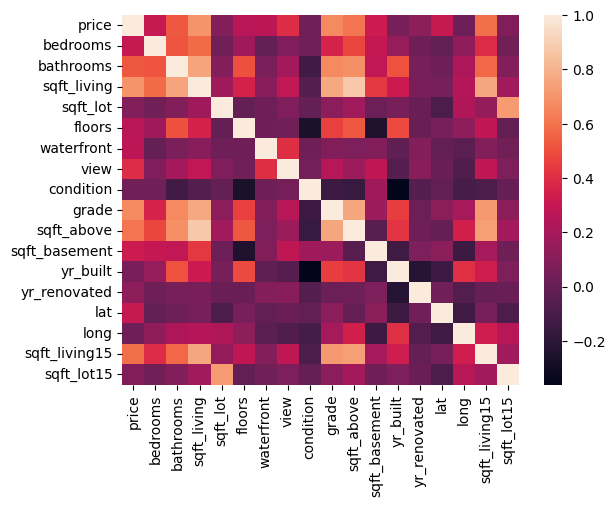

In [9]:
corr = df.corr()
sns.heatmap(corr);

### **2. Define features (X) and target(y)**

In [10]:
X = df.drop('price' , axis='columns')
y = df['price']

### **3. Scaling**

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

### **4. Splitting**

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , shuffle= True , random_state=42)

## **Machine learning model**

### **1. Linear regression model**

In [13]:
# training
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [14]:
# training evaluation
lr_model.score(X_train , y_train)

0.6951061685855411

In [15]:
# prediction
lr_pred = lr_model.predict(X_test)

In [16]:
mean_squared_error(y_test , lr_pred)

0.3413051251896043

In [17]:
r2_score(y_test , lr_pred)

0.6957217324800986

### **2. Lasso**

In [18]:
lasso = Lasso(max_iter=1000 , alpha=0.0001)
lasso.fit(X_train , y_train)

Lasso(alpha=0.0001)

In [19]:
lasso.score(X_train , y_train)

0.6951034892765643

#### Same as linear regression model

### **3. Ridge**

In [20]:
ridge = Ridge(alpha=0.0001 , max_iter=1000)
ridge.fit(X_train , y_train)

Ridge(alpha=0.0001, max_iter=1000)

In [21]:
ridge.score(X_train , y_train)

0.6951038946870622

#### Same as the other two linear models

### As i observed that the data isn't linear now the results proved it as the linear regression model gets low accuracy of 69% accuracy

### **4. Decision Tree model**

In [22]:
DS_model = DecisionTreeRegressor()
DS_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [23]:
DS_model.score(X_train , y_train)

0.9992357508194403

In [24]:
DS_pred = DS_model.predict(X_test)

In [25]:
mean_squared_error(y_test , DS_pred)

0.3422170439776791

In [26]:
r2_score(y_test , DS_pred)

0.6949087441934443

#### Overfitting happend in this model

### **5. Random forest model**

In [27]:
RF_model = RandomForestRegressor(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestRegressor()

In [28]:
RF_model.score(X_train , y_train)

0.9819531228347442

In [29]:
RF_pred = RF_model.predict(X_test)

In [30]:
mean_squared_error(y_test , RF_pred)

0.16561307925560853

In [31]:
r2_score(y_test , RF_pred)

0.8523536357488383

### **5. SVR**

In [32]:
svr = SVR(gamma='auto' , C=5)
svr.fit(X_train , y_train)

SVR(C=5, gamma='auto')

In [33]:
svr.score(X_train , y_train)

0.8908694830507264

In [34]:
svr_pred = svr.predict(X_test)

In [35]:
mean_squared_error(y_test , svr_pred)

0.21981942253228554

In [36]:
r2_score(y_test , svr_pred)

0.8040279265710063

## Conclusion

#### SVR is the higher accuracy and the less going to overfitting from the others models

#### 